<a href="https://colab.research.google.com/github/Shah-in-alam/AI-Basic-to-Advance/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An RNN (Recurrent Neural Network) is a type of neural network specifically designed for sequential data, where past information matters.

Unlike CNNs (which are great for images), RNNs are ideal for:

Time series forecasting

Text and language modeling

Speech recognition

Stock price prediction

In [3]:
pip install torchaudio sounddevice


In [5]:
!apt-get install -y libportaudio2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (765 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_lo

In [11]:
import torch
import torchaudio
from torchaudio.pipelines import WAV2VEC2_ASR_BASE_960H
from google.colab import files

# Upload your file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load audio
waveform, sample_rate = torchaudio.load(filename)
bundle = WAV2VEC2_ASR_BASE_960H
model = bundle.get_model().eval()

# Resample if needed
if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

# Get labels
labels = bundle.get_labels()
blank = labels.index("|") if "|" in labels else 0
dictionary = {i: l for i, l in enumerate(labels)}

# Inference
with torch.inference_mode():
    emissions, _ = model(waveform)
    predicted_ids = torch.argmax(emissions[0], dim=-1)

# Decode
def decode(ids):
    result = []
    last = blank
    for i in ids:
        i = int(i)
        if i != last:
            if i != blank:
                result.append(dictionary[i])
            last = i
    return ''.join(result).replace("|", " ")

transcription = decode(predicted_ids)
print("📝 Transcription:", transcription)





Saving 2902-9008-0000.flac to 2902-9008-0000 (1).flac
📝 Transcription: -THE-PL-A-C-E--S-E-EM-ED-F-R-A-G-R-AN-T--W-ITH-AL-LTHE-R-I-C-H-E-SOF-G-RE-EK--TH-OU-GHT--AN-D-S-O-NG--S-IN-CE-THE-D-A-Y-S--WH-EN--PT-O-L-E-M-E--PH-I-L-A-D-E-L-PH-U-S--W-AL-K-E-D-TH-E-RE-W-ITH-EU-C-L-I-D--AND-TH-E-O-C-R-A-T-I-S--C-A-L-A-M-A-CH-U-S--AN-DL-Y-C-O-PH-R-O-N--


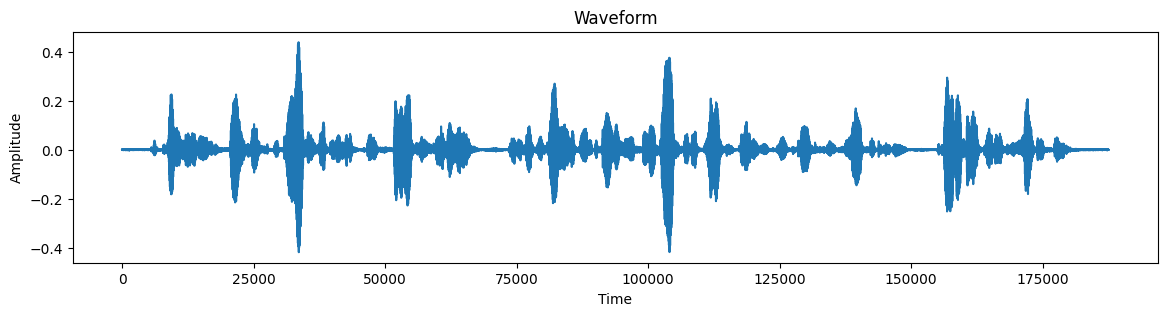

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 3))
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


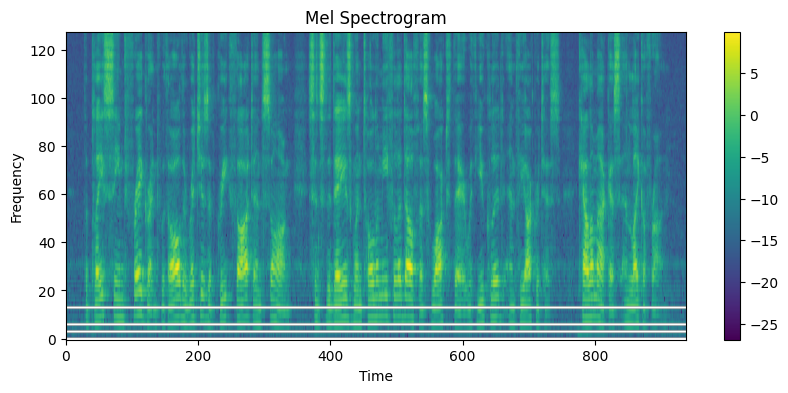

In [13]:
import torchaudio.transforms as T

spec = T.MelSpectrogram(sample_rate=bundle.sample_rate)(waveform)
plt.figure(figsize=(10, 4))
plt.imshow(spec.log2()[0].numpy(), aspect='auto', origin='lower')
plt.title("Mel Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()


In [14]:
from collections import Counter

words = transcription.lower().split()
print("Total Words:", len(words))
print("Word Frequencies:", Counter(words).most_common(5))


Total Words: 1
Word Frequencies: [('-the-pl-a-c-e--s-e-em-ed-f-r-a-g-r-an-t--w-ith-al-lthe-r-i-c-h-e-sof-g-re-ek--th-ou-ght--an-d-s-o-ng--s-in-ce-the-d-a-y-s--wh-en--pt-o-l-e-m-e--ph-i-l-a-d-e-l-ph-u-s--w-al-k-e-d-th-e-re-w-ith-eu-c-l-i-d--and-th-e-o-c-r-a-t-i-s--c-a-l-a-m-a-ch-u-s--an-dl-y-c-o-ph-r-o-n--', 1)]


In [15]:
from textblob import TextBlob

blob = TextBlob(transcription)
print("Sentiment Polarity:", blob.sentiment.polarity)  # -1 (negative) to +1 (positive)


Sentiment Polarity: 0.0


In [17]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=7220c6806b71353a77a3d45cb161efe3cfe2f7bb1c2e0af3ed212c344baaca44
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

In [25]:
from googletrans import Translator

translator = Translator()
translated = translator.translate(transcription, dest='de')  # 'fr' for French
print("French Translation:", translated.text)


French Translation: -The-pl-a-c-e--s-e-em-ed-f-r-a-g-r-an-t-w-the-r-i-c-h-e-sof-g-re-ek-th-ou-ght-an-d-s-o-ng- -S-in-in-in-the-d-a-s-wh-pt-o-o-o-o-o-o-oL-e-m-e-Ph-i-l-a-d-e-l-ph-u-s-w-al-k-e-d-th-e-w-th-eu-c-l-i-d-und--th-o-c-r-r-i-t-i-s-c-a-l-a-a-ch-u-s-dl-y-o-t-o-o-o-n


TEXT TO SPEACH

In [26]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.31.0 requires httpx>=0.24.1, but you have httpx 0.13.3 which is incompatible.


In [30]:
text = "হ্যালো! এটি পাইথন ব্যবহার করে টেক্সটকে কথায় রূপান্তর করার একটি পরীক্ষা।"
tts = gTTS(text=text, lang='bn')
tts.save("bangla_speech.mp3")

# Play the audio
Audio("bangla_speech.mp3")

